In [4]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import tensorflow as tf
# tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [6]:
df = pd.read_csv('딥러닝/iris.csv', names = ['sepal_length','sepal_width', 'petal_length', 'patal_width', 'species'])
df

,sepal_length,sepal_width,petal_length,patal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


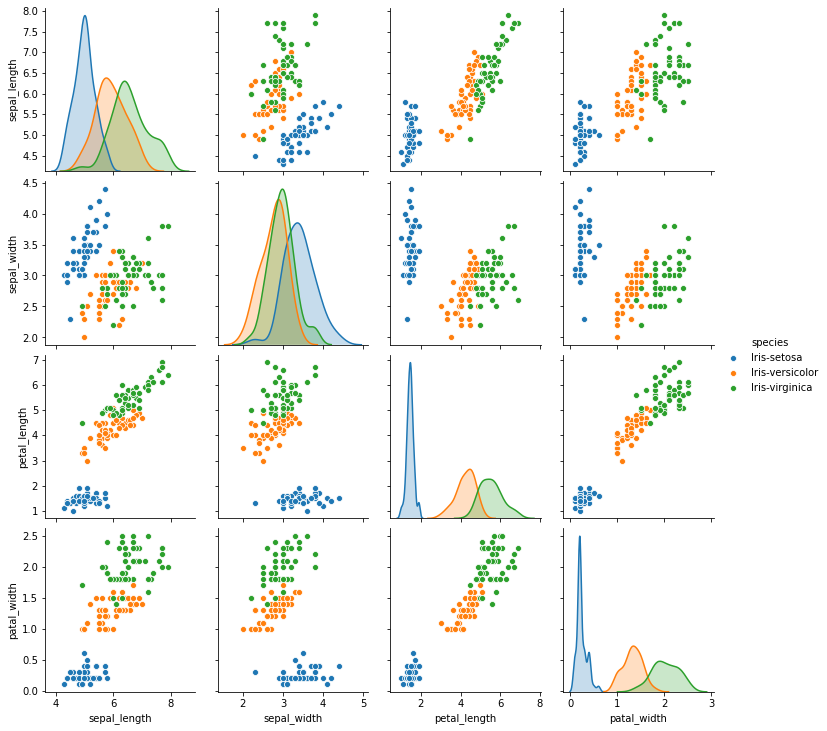

In [7]:
sns.pairplot(df, hue = 'species')

In [8]:
data = df.values # array로  나옴 
x = data[:, 0:4].astype('float')

In [9]:
ydata = data[:,4]
le = LabelEncoder()
le.fit(ydata)
y = le.transform(ydata)

In [10]:
y = np_utils.to_categorical(y)

In [21]:
model = Sequential()
model.add(Dense(units =3, input_dim = 2*2, activation= 'relu')) # 레이어 설계, 입력데이터의 차원
# 입력 =784, 출력=인 레이어 추가 

# model.add(Dense(units = 128, activation= 'relu')) # 레이어 설계, 히든 계층
# model.add(Dense(units = 64, activation= 'relu')) # 레이어 설계, 히든 계층
model.add(Dense(units = 3, activation= 'softmax')) # 출력 값

In [22]:
# 3번 모델 학습과정 설정 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy']) # loss == cost
hist = model.fit(x, y, batch_size=32,  epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 1ms/step - loss: 0.9629 - accuracy: 0.3333
Epoch 2/500
5/5 [==============================] - 0s 997us/step - loss: 0.9515 - accuracy: 0.3600
Epoch 3/500
5/5 [==============================] - 0s 1ms/step - loss: 0.9409 - accuracy: 0.6133
Epoch 4/500
5/5 [==============================] - 0s 997us/step - loss: 0.9309 - accuracy: 0.6600
Epoch 5/500
5/5 [==============================] - 0s 1ms/step - loss: 0.9207 - accuracy: 0.6600
Epoch 6/500
5/5 [==============================] - 0s 798us/step - loss: 0.9104 - accuracy: 0.6600
Epoch 7/500
5/5 [==============================] - 0s 1ms/step - loss: 0.9007 - accuracy: 0.6533
Epoch 8/500
5/5 [==============================] - 0s 997us/step - loss: 0.8912 - accuracy: 0.6533
Epoch 9/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8817 - accuracy: 0.6533
Epoch 10/500
5/5 [==============================] - 0s 997us/step - loss: 0.8705 - accuracy: 0.6533
Epoch 11/500
5/5 [=

In [23]:
yhat = model.predict(x)
yhat # yhat을 모두 더하면, 1이 나옴 왜냐? 확률이기 때문에!
# ytest[0:1]
yhat[0]

array([9.9369460e-01, 6.3054375e-03, 1.6760270e-10], dtype=float32)

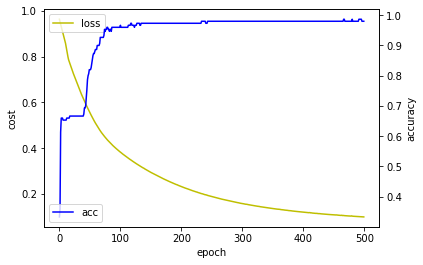

In [24]:
fig, axes = plt.subplots()
accax = axes.twinx() # 윈도우 하나에 여러개 그릴 수 있음
axes.plot(hist.history['loss'], 'y', label = 'loss')
# axes.plot(hist.history['val_loss'], 'r', label = 'val_loss')
accax.plot(hist.history['accuracy'], 'b', label = 'acc')
# accax.plot(hist.history['val_acc'], 'g', label = 'val_acc')

axes.set_xlabel('epoch')
axes.set_ylabel('cost')
accax.set_ylabel('accuracy')
axes.legend(loc = 'upper left')
accax.legend(loc = 'lower left')